### Author: Uday Routhu

In [78]:
#1. Use KMeans to create various customer segments.
   #1.Use an Elbow Plot of inertia.
   #2.And a plot of Silhouette Scores.
   #3.Choose a K based on the results.
#2.Submit your notebook below.

### Imports


In [79]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import warnings
import os

In [80]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [81]:
csv_file_path = "C:\\Users\\uurou\\OneDrive\\Documents\\GitHub\\dojo-env-setup\\files\\cust_seg.csv"
df_temp = pd.read_csv(csv_file_path)
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [82]:
selected_columns = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted', 'DebtIncomeRatio']
# Extract selected columns
df = df_temp[selected_columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [84]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


In [85]:
# Impute missing values using median
imputer = SimpleImputer(strategy='median')
scaled_df = imputer.fit_transform(scaled_df)

#### 1. Use an Elbow Plot of inertia.

Text(0, 0.5, 'inertia')

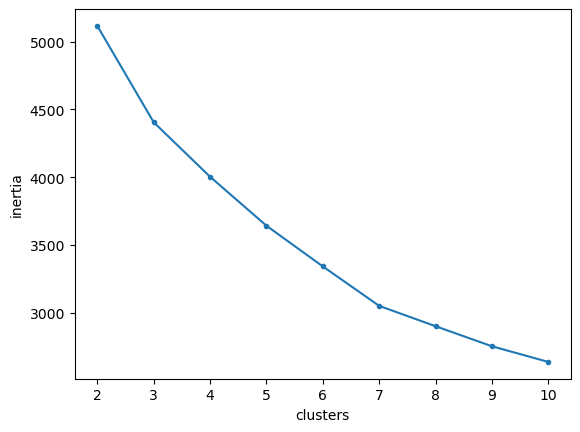

In [86]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

#### 2.And a plot of Silhouette Scores.

In [87]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.4044005612287092

#### 3.Choose a K based on the results.

In [88]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

C:\Users\uurou\AppData\Local\Temp\ipykernel_1124\1656899453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster2'] = kmeans2.labels_
C:\Users\uurou\AppData\Local\Temp\ipykernel_1124\1656899453.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster3'] = kmeans3.labels_


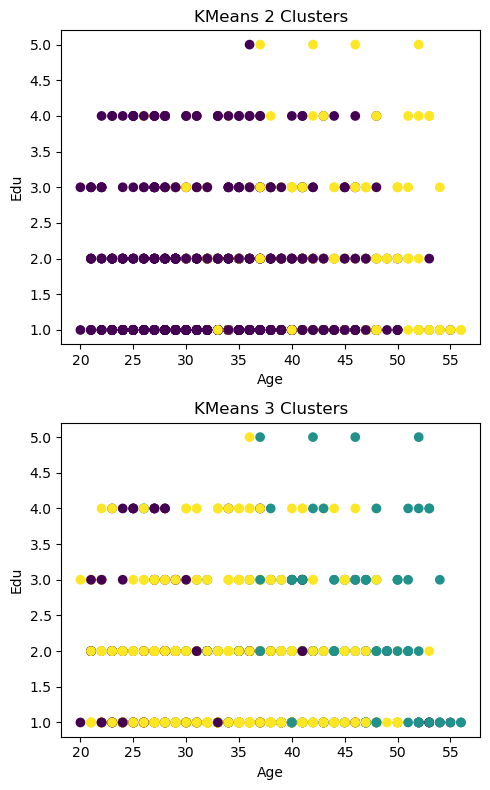

In [90]:
# Save the cluster labels to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Age'], df['Edu'], c = df['cluster2'])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Edu')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Age'], df['Edu'], c = df['cluster3'])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Edu')
axes[1].set_title('KMeans 3 Clusters')
plt.tight_layout();